In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Saving/Loading Data with Numpy

Numpy has a few different saving methods built in. Two important methods are np.save() and np.savez(). The save method will save a single array to a binary file in the .npy format, while the savez method will save multiple arrays to single file in an uncompressed .npz format. There is also a savez_compressed method that will save multiple arrays into a single file in a compressed .npz format.

Both savez and savez_compressed do not save the variables names, but instead store each variable as 'arr_0', 'arr_1', and so on... so it may be useful to store the variable names as the first array (see below).

In [2]:
#A numpy array of coordinates
coordinates = np.asarray([[0,0], [3,1], [6,4], [9,15], [10,20]])

In [3]:
#A numpy array of values for our above coordinates
valueSet = np.asarray([25, 30, 100, 13, -5])

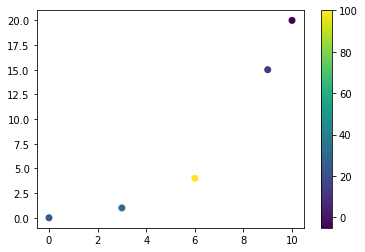

In [4]:
#Get an idea of the data
plt.scatter(coordinates[:,0], coordinates[:,1], c = valueSet)
plt.colorbar()
plt.show()

In [5]:
#Create an array of the variable names so it's easy to identify the data later
variableNames = np.asarray(['coordinates', 'valueset'])

#Save the data
#Reference: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez.html#numpy.savez
np.savez('myData.npz', variableNames, coordinates, valueSet)

In [6]:
#Load the data
#Reference: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.load.html#numpy.load
loadedData = np.load('myData.npz')

In [7]:
whos

Variable        Type       Data/Info
------------------------------------
coordinates     ndarray    5x2: 10 elems, type `int64`, 80 bytes
loadedData      NpzFile    <numpy.lib.npyio.NpzFile <...>object at 0x7fc958461ef0>
np              module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt             module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
valueSet        ndarray    5: 5 elems, type `int64`, 40 bytes
variableNames   ndarray    2: 2 elems, type `<U11`, 88 bytes


In [8]:
print(loadedData.files)

['arr_0', 'arr_1', 'arr_2']


In [9]:
print(loadedData['arr_0'])

['coordinates' 'valueset']


In [10]:
loadedCoordinates = loadedData['arr_1']
loadedValueSet = loadedData['arr_2']

#Check integrity of data
if loadedCoordinates.all() == coordinates.all():
    print('Coordinate data loaded correctly')
else:
    print('Coordinate data loaded incorrectly')

if loadedValueSet.all() == valueSet.all():
    print('Value set data loaded correctly')
else:
    print('Value set data loaded incorrectly')

Coordinate data loaded correctly
Value set data loaded correctly


In [11]:
whos

Variable            Type       Data/Info
----------------------------------------
coordinates         ndarray    5x2: 10 elems, type `int64`, 80 bytes
loadedCoordinates   ndarray    5x2: 10 elems, type `int64`, 80 bytes
loadedData          NpzFile    <numpy.lib.npyio.NpzFile <...>object at 0x7fc958461ef0>
loadedValueSet      ndarray    5: 5 elems, type `int64`, 40 bytes
np                  module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt                 module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
valueSet            ndarray    5: 5 elems, type `int64`, 40 bytes
variableNames       ndarray    2: 2 elems, type `<U11`, 88 bytes


# Sum/Average/Standard Deviation etc. Over Multiple Dimensions

An interesting component of numpy methods such as average(), sum(), std(), and so on... is the ability to compute a value over a chosen axis/dimension.

In [12]:
singleDimensionalData = np.asarray([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

# How many axes can we compute the sum over?
print('Number of axes:', len(singleDimensionalData.shape)) #length of dimensions
print('Sum over a flattened array:', singleDimensionalData.sum())
print('Sum over the first axis:', singleDimensionalData.sum(axis=0))

try:
    print('Sum over the first axis:', singleDimensionalData.sum(axis=1))
except:
    print('Cannot compute sum over the second axis since there is only 1 axis!')

Number of axes: 1
Sum over a flattened array: 0
Sum over the first axis: 0
Cannot compute sum over the second axis since there is only 1 axis!


In [13]:
multiDimensionalData = np.array([[[1,2,3], [4,5,6], [7,8,9]],
                                 [[-1,-2,-3], [-4,-5,-6], [-7,-8,-9]],
                                 [[-1,0,1], [0,2,4], [7,8,9]]])
print(multiDimensionalData.shape)

(3, 3, 3)


In [14]:
# How many axes can we compute the sum over?
print('Number of axes:', len(multiDimensionalData.shape)) #length of dimensions
print('Sum over a flattened array:', multiDimensionalData.sum())
print('Sum over the first axis:', multiDimensionalData.sum(axis=0))
print('Sum over the second axis:', multiDimensionalData.sum(axis=1))
print('Sum over the third axis:', multiDimensionalData.sum(axis=2))
#Axis has always confused me, a good read that explains it is here: https://medium.com/@aerinykim/numpy-sum-axis-intuition-6eb94926a5d1


Number of axes: 3
Sum over a flattened array: 30
Sum over the first axis: [[-1  0  1]
 [ 0  2  4]
 [ 7  8  9]]
Sum over the second axis: [[ 12  15  18]
 [-12 -15 -18]
 [  6  10  14]]
Sum over the third axis: [[  6  15  24]
 [ -6 -15 -24]
 [  0   6  24]]


# Basemap (although better to learn cartopy I think)
To install basemap, follow the installation description here: https://matplotlib.org/basemap/users/installing.html

In [ ]:
#I don't have basemap installed on this pc, so can't run the below!
"""
longitude = [0, 80]
latitude = [-45, 45]

from mpl_toolkits.basemap import Basemap

#Instantiage a figure
plt.figure(figsize=(18,10))

#Create a Basemap object, projection = Mercator, llcrnrlat = lowerleft corner latitude, urcrnrlat = upper right corner latitude, and so on
m = Basemap(projection='merc',llcrnrlat=np.min(latitude),urcrnrlat=np.max(latitude),llcrnrlon=np.min(longitude),urcrnrlon=np.max(longitude),resolution='c')
m.drawcoastlines()
m.fillcontinents(color='white')

x = m.imshow([0,0,1,1], cmap = coolwarm, extent = [np.min(longitude), np.max(longitude), np.min(latitude), np.max(latitude)])

plt.title("Using BaseMap!")
#plt.colorbar()
plt.show()

"""

# Creating an animation
I've borrowed code from Shane for the below.

In [15]:
import os

fig_dir = 'fig'

#Create folders if necessary
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [16]:
#Initialise some data
coordinates = []
coordinates.append([[0,0], [-3,1], [1,1], [3,3], [10,3]])
#shape is [timestep, element, coordinate x or y]

values = [0,12,25,35,-15]

In [17]:
#Let's move the points around and recolour them as we see fit

for i in range(1,100):
    newCoordinates = []
    newValues = []
    for j in range(len(coordinates[0])):
        randomNumberX = 2*np.random.random_sample() -1 #a random number between -1 and 1
        randomNumberY = 2*np.random.random_sample() -1 #a random number between -1 and 1
        
        x = coordinates[-1][j][0] + randomNumberX
        y = coordinates[-1][j][1] + randomNumberY
        
        newCoordinates.append([x,y])
        
        
    coordinates.append(newCoordinates)
    

In [18]:
#convert to numpy arrays to make everything easy
coordinates = np.asarray(coordinates)
values = np.asarray(values)

#min/max values to keep images consistent
xmin = np.min(coordinates[:,:,0]); xmax = np.max(coordinates[:,:,0]); ymin = np.min(coordinates[:,:,1]); ymax = np.max(coordinates[:,:,1])

In [19]:
fig = plt.figure(figsize=(5, 5))
for timestep in range(0,100):

    #ax = plt.axes()
    plt.scatter(coordinates[timestep,:,0], coordinates[timestep,:,1], c=values, s=20, edgecolors="none")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.colorbar()
    plt.title('Moving dots at timestep: ' + str(timestep))
    
    fig.savefig(fig_dir +'/moving_dots_{:0>3d}.png'.format(timestep),bbox_inches='tight')
    
    if timestep%10 == 0:
        print('Saved image at timestep', timestep)
        
    fig.clear()

print("Plotted all images")

Saved image at timestep 0
Saved image at timestep 10
Saved image at timestep 20
Saved image at timestep 30
Saved image at timestep 40
Saved image at timestep 50
Saved image at timestep 60
Saved image at timestep 70
Saved image at timestep 80
Saved image at timestep 90
Plotted all images


<Figure size 360x360 with 0 Axes>

In [20]:
# Create an animation
import os
def save_movie(image_filenames,movie_filename,framerate):
    os.system('ffmpeg -framerate ' + str(framerate) + ' -i ' + image_filenames + ' -vb 20M -vcodec mpeg4 -y ' + movie_filename)


save_movie(fig_dir + '/moving_dots_%03d.png', fig_dir +'/moving_dots_movie.mp4',10)